In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
import os

In [36]:
from sklearn.model_selection import train_test_split
data = pd.read_csv("/content/IRIS.csv",delimiter=",")

In [37]:
print(data.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [38]:
print(data.tail())

     sepal_length  sepal_width  petal_length  petal_width         species
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica


In [39]:
print(data.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [40]:
data.dropna(inplace=True) #for null values

In [42]:
X = data.iloc[:, [0,1,2,3]]
y = data.iloc[:,4]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = pd.DataFrame(le.fit_transform(y))
from keras.utils import to_categorical
#y_test= to_categorical(y_test, num_classes= 3)
y= to_categorical(y, num_classes= 3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(X_train.shape)

(120, 4)


In [43]:
print(y)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [44]:
model = keras.Sequential([
    keras.layers.Dense(78, activation='relu'),
    keras.layers.Dense(40, activation='relu'),
    keras.layers.Dense(3, activation='sigmoid')
])


In [45]:
model.build((150,4))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (150, 78)                 390       
                                                                 
 dense_4 (Dense)             (150, 40)                 3160      
                                                                 
 dense_5 (Dense)             (150, 3)                  123       
                                                                 
Total params: 3673 (14.35 KB)
Trainable params: 3673 (14.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


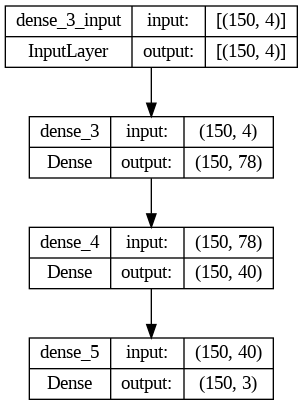

In [46]:
tf.keras.utils.plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [47]:
model.compile(optimizer='Adam', loss='categorical_crossentropy',
              metrics=['Accuracy'])

In [48]:
history = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
4/4 [==============================] - 1s 5ms/step - loss: 2.0176 - Accuracy: 0.3083
Epoch 2/20
4/4 [==============================] - 0s 5ms/step - loss: 1.4918 - Accuracy: 0.3083
Epoch 3/20
4/4 [==============================] - 0s 6ms/step - loss: 1.1425 - Accuracy: 0.3083
Epoch 4/20
4/4 [==============================] - 0s 6ms/step - loss: 0.9936 - Accuracy: 0.4750
Epoch 5/20
4/4 [==============================] - 0s 6ms/step - loss: 0.9424 - Accuracy: 0.6750
Epoch 6/20
4/4 [==============================] - 0s 5ms/step - loss: 0.9107 - Accuracy: 0.6917
Epoch 7/20
4/4 [==============================] - 0s 4ms/step - loss: 0.8754 - Accuracy: 0.6917
Epoch 8/20
4/4 [==============================] - 0s 5ms/step - loss: 0.8329 - Accuracy: 0.6917
Epoch 9/20
4/4 [==============================] - 0s 5ms/step - loss: 0.7859 - Accuracy: 0.6917
Epoch 10/20
4/4 [==============================] - 0s 6ms/step - loss: 0.7474 - Accuracy: 0.6917
Epoch 11/20
4/4 [======================

In [49]:
scores = model.evaluate(X_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

4/4 [==============================] - 0s 4ms/step - loss: 0.4945 - Accuracy: 0.7167
Training Accuracy: 71.67%

1/1 [==============================] - 0s 29ms/step - loss: 0.5375 - Accuracy: 0.5667
Testing Accuracy: 56.67%



In [50]:
print(model.predict(X_test))

1/1 [==============================] - 0s 65ms/step
[[0.10005203 0.5558927  0.7616439 ]
 [0.20850456 0.48495054 0.51033366]
 [0.8068252  0.2285263  0.09533717]
 [0.07902966 0.5711414  0.736904  ]
 [0.7405025  0.2687765  0.13386825]
 [0.08234689 0.5682719  0.78397894]
 [0.7556128  0.25888777 0.1285994 ]
 [0.17625585 0.49635646 0.53857636]
 [0.157392   0.5042434  0.5607035 ]
 [0.22909625 0.47754112 0.48993525]
 [0.11499436 0.5616615  0.70161283]
 [0.19952065 0.49114648 0.5220949 ]
 [0.17948893 0.5070873  0.5558094 ]
 [0.16301519 0.50698394 0.5708381 ]
 [0.1719271  0.5103598  0.575915  ]
 [0.72277474 0.2815944  0.14263   ]
 [0.17864516 0.5077716  0.5746469 ]
 [0.19070384 0.5125718  0.5758156 ]
 [0.699068   0.29108605 0.16182023]
 [0.77736306 0.24038075 0.11085604]
 [0.12570779 0.5531694  0.7188104 ]
 [0.18861176 0.51007366 0.5839357 ]
 [0.6997026  0.29566106 0.16216381]
 [0.70005924 0.30040327 0.17145896]
 [0.13688852 0.532667   0.6544843 ]
 [0.7849302  0.25903213 0.12580052]
 [0.71680444

In [51]:
prediction = tf.cast(tf.greater(model.predict(X_test), 0.5), tf.int32)

print("Prediction:", prediction[2], "Target:", y_test[2])

1/1 [==============================] - 0s 23ms/step
Prediction: tf.Tensor([1 0 0], shape=(3,), dtype=int32) Target: [1. 0. 0.]


In [52]:
print(history.history.keys())

dict_keys(['loss', 'Accuracy'])


In [53]:

history = model.fit(X_train,y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)
#first mechanism to improve model performance using validation set

Epoch 1/50
4/4 [==============================] - 0s 54ms/step - loss: 0.4909 - Accuracy: 0.7333 - val_loss: 0.5113 - val_Accuracy: 0.6667
Epoch 2/50
4/4 [==============================] - 0s 26ms/step - loss: 0.4772 - Accuracy: 0.8167 - val_loss: 0.4941 - val_Accuracy: 0.7333
Epoch 3/50
4/4 [==============================] - 0s 24ms/step - loss: 0.4643 - Accuracy: 0.8417 - val_loss: 0.4824 - val_Accuracy: 0.7333
Epoch 4/50
4/4 [==============================] - 0s 24ms/step - loss: 0.4520 - Accuracy: 0.8500 - val_loss: 0.4755 - val_Accuracy: 0.7333
Epoch 5/50
4/4 [==============================] - 0s 21ms/step - loss: 0.4415 - Accuracy: 0.8167 - val_loss: 0.4710 - val_Accuracy: 0.6667
Epoch 6/50
4/4 [==============================] - 0s 12ms/step - loss: 0.4316 - Accuracy: 0.8167 - val_loss: 0.4565 - val_Accuracy: 0.7333
Epoch 7/50
4/4 [==============================] - 0s 12ms/step - loss: 0.4217 - Accuracy: 0.8583 - val_loss: 0.4399 - val_Accuracy: 0.7667
Epoch 8/50
4/4 [===========

In [54]:
print(history.history.keys())

dict_keys(['loss', 'Accuracy', 'val_loss', 'val_Accuracy'])


In [55]:
scores = model.evaluate(X_train,y_train)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test,y_test)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

4/4 [==============================] - 0s 5ms/step - loss: 0.1575 - Accuracy: 0.9667
Training Accuracy: 96.67%

1/1 [==============================] - 0s 32ms/step - loss: 0.1420 - Accuracy: 1.0000
Testing Accuracy: 100.00%



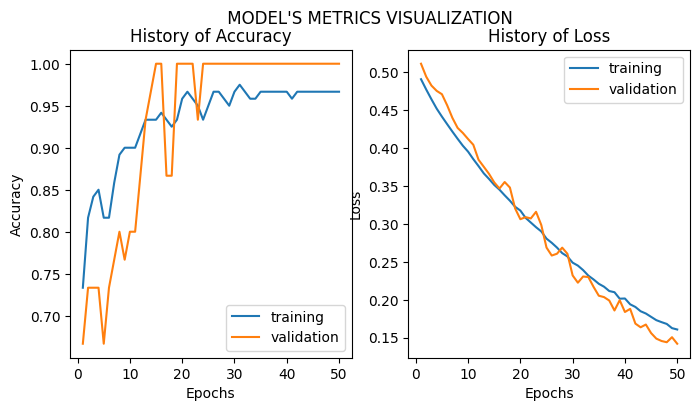

In [56]:
import matplotlib.pyplot as plt
def Train_Val_Plot(acc,val_acc,loss,val_loss):

    fig, (ax1, ax2) = plt.subplots(1,2, figsize= (8,4))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    plt.show()


Train_Val_Plot(history.history['Accuracy'],history.history['val_Accuracy'],
               history.history['loss'],history.history['val_loss'])